# ***Data Analytics Final Project*** 

# 1. Importing Libraries


In [35]:
import numpy as np 
import seaborn as sns
import statistics as st
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2. Reading The Data

In [36]:
import pandas as pd 
df = pd.read_csv("/content/Final.csv")
df

,TRADE_DATE,SEC_CODE,SYMBOL1,MARKET,VOLUME,TRADE_QTY,NO_OF_TRADES,HIGH,BEST_ASK_PRICE,BEST_ASK_QTY,BEST_BID_PRICE,BEST_BID_QTY,LOW
0,1/2/2022,111001,JOIB,1,199083.73,54378,73,3.67,2.65,585,3.13,2000,3.65
1,1/2/2022,111002,JOKB,1,12707.76,9009,17,1.42,1.36,493,1.86,1570,1.41
2,1/2/2022,111003,JCBK,2,727.41,726,7,1.03,1.14,1853,1.64,1000,1.00
3,1/2/2022,111004,THBK,1,1558.10,394,5,3.97,1.09,660,1.59,46,3.95
4,1/2/2022,111006,SIBK,1,29030.98,14867,11,1.98,1.23,1000,1.73,333,1.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28007,31/10/2022,141214,ASAS,2,1025509.50,1981726,25,0.52,1.55,2462,2.04,0,0.51
28008,31/10/2022,141215,UCIC,2,154.70,455,2,0.34,1.02,6959,1.52,14710,0.34
28009,31/10/2022,141223,SHBA,2,57426.99,10276,14,5.61,1.29,70,1.79,0,5.35
28010,31/10/2022,141224,NCCO,1,1135.00,500,1,2.27,1.00,500,1.50,500,2.27


In [37]:
df["HIGH"].value_counts()

0.36    341
0.38    329
0.47    317
0.37    317
0.35    310
       ... 
8.94      1
6.21      1
6.85      1
6.94      1
8.99      1
Name: HIGH, Length: 1072, dtype: int64

In [38]:
df["LOW"].value_counts()

0.38     346
0.35     334
0.45     334
0.37     331
0.36     323
        ... 
17.63      1
10.29      1
6.08       1
26.20      1
5.35       1
Name: LOW, Length: 1007, dtype: int64

# 3. Exploring The Data 

In [39]:
df.columns

Index(['TRADE_DATE', 'SEC_CODE', 'SYMBOL1', 'MARKET', 'VOLUME', 'TRADE_QTY',
       'NO_OF_TRADES', 'HIGH', 'BEST_ASK_PRICE', 'BEST_ASK_QTY',
       'BEST_BID_PRICE', 'BEST_BID_QTY', 'LOW'],
      dtype='object')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28012 entries, 0 to 28011
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TRADE_DATE      28012 non-null  object 
 1   SEC_CODE        28012 non-null  int64  
 2   SYMBOL1         28012 non-null  object 
 3   MARKET          28012 non-null  int64  
 4   VOLUME          28012 non-null  float64
 5   TRADE_QTY       28012 non-null  int64  
 6   NO_OF_TRADES    28012 non-null  int64  
 7   HIGH            28012 non-null  float64
 8   BEST_ASK_PRICE  28012 non-null  float64
 9   BEST_ASK_QTY    28012 non-null  int64  
 10  BEST_BID_PRICE  28012 non-null  float64
 11  BEST_BID_QTY    28012 non-null  int64  
 12  LOW             28012 non-null  float64
dtypes: float64(5), int64(6), object(2)
memory usage: 2.8+ MB


In [41]:
df.describe()

,SEC_CODE,MARKET,VOLUME,TRADE_QTY,NO_OF_TRADES,HIGH,BEST_ASK_PRICE,BEST_ASK_QTY,BEST_BID_PRICE,BEST_BID_QTY,LOW
count,28012.000000,28012.000000,2.801200e+04,2.801200e+04,28012.000000,28012.000000,28012.000000,2.801200e+04,28012.000000,2.801200e+04,28012.000000
mean,131287.967871,1.385906,6.312677e+04,4.270346e+04,28.061545,1.713816,1.620775,1.979999e+04,2.113421,2.452341e+04,1.680022
std,9043.995400,0.750480,3.022558e+05,1.451785e+05,66.231007,4.667872,1.520599,6.742718e+04,1.500857,1.008184e+05,4.580905
min,111001.000000,0.000000,2.000000e-02,1.000000e+00,1.000000,0.020000,1.000000,0.000000e+00,1.500000,0.000000e+00,0.010000
25%,131052.000000,1.000000,6.398300e+02,1.000000e+03,3.000000,0.380000,1.050000,5.000000e+02,1.550000,4.000000e+02,0.370000
50%,131243.000000,2.000000,3.831125e+03,5.873500e+03,9.000000,0.710000,1.180000,2.100000e+03,1.680000,1.912000e+03,0.690000
75%,141014.000000,2.000000,2.014495e+04,2.843675e+04,25.000000,1.460000,1.550000,9.494250e+03,2.040000,1.038675e+04,1.432500
max,142041.000000,2.000000,8.868824e+06,5.741963e+06,1700.000000,44.500000,40.000000,1.017951e+06,40.000000,3.600734e+06,44.040000


In [42]:
df.isnull().sum()

TRADE_DATE        0
SEC_CODE          0
SYMBOL1           0
MARKET            0
VOLUME            0
TRADE_QTY         0
NO_OF_TRADES      0
HIGH              0
BEST_ASK_PRICE    0
BEST_ASK_QTY      0
BEST_BID_PRICE    0
BEST_BID_QTY      0
LOW               0
dtype: int64

In [43]:
df.corr()

<ipython-input-43-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,SEC_CODE,MARKET,VOLUME,TRADE_QTY,NO_OF_TRADES,HIGH,BEST_ASK_PRICE,BEST_ASK_QTY,BEST_BID_PRICE,BEST_BID_QTY,LOW
SEC_CODE,1.000000,0.113634,0.029074,0.001203,0.080537,0.089275,0.080564,0.013348,0.080564,0.009386,0.087945
MARKET,0.113634,1.000000,-0.034048,0.045583,0.001102,-0.089998,0.001116,-0.099576,0.001093,-0.089226,-0.089948
VOLUME,0.029074,-0.034048,1.000000,0.620277,0.777427,0.310333,0.777378,-0.026209,0.777434,-0.011380,0.304766
TRADE_QTY,0.001203,0.045583,0.620277,1.000000,0.449219,-0.013221,0.449198,0.080231,0.449170,0.075985,-0.014457
NO_OF_TRADES,0.080537,0.001102,0.777427,0.449219,1.000000,0.288890,0.999997,-0.020228,0.999998,0.001323,0.283693
HIGH,0.089275,-0.089998,0.310333,-0.013221,0.288890,1.000000,0.289028,-0.086154,0.289048,-0.070636,0.999832
BEST_ASK_PRICE,0.080564,0.001116,0.777378,0.449198,0.999997,0.289028,1.000000,-0.020253,0.999999,0.001313,0.283831
BEST_ASK_QTY,0.013348,-0.099576,-0.026209,0.080231,-0.020228,-0.086154,-0.020253,1.000000,-0.020260,0.271098,-0.086282
BEST_BID_PRICE,0.080564,0.001093,0.777434,0.449170,0.999998,0.289048,0.999999,-0.020260,1.000000,0.001308,0.283850
BEST_BID_QTY,0.009386,-0.089226,-0.011380,0.075985,0.001323,-0.070636,0.001313,0.271098,0.001308,1.000000,-0.070707


In [44]:
df.duplicated().sum()

0

# 4. Preparing The Data

In [45]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['SYMBOL1'] = label_encoder.fit_transform(df['SYMBOL1'])

In [46]:
df['SYMBOL1'].value_counts()

107    247
119    247
43     247
36     247
9      247
      ... 
73       2
55       1
139      1
16       1
71       1
Name: SYMBOL1, Length: 213, dtype: int64

In [47]:
import datetime as dt
df['TRADE_DATE'] = pd.to_datetime(df['TRADE_DATE'], format = '%d/%m/%Y')
df['Month'] = df['TRADE_DATE'].dt.month

In [48]:
df.columns

Index(['TRADE_DATE', 'SEC_CODE', 'SYMBOL1', 'MARKET', 'VOLUME', 'TRADE_QTY',
       'NO_OF_TRADES', 'HIGH', 'BEST_ASK_PRICE', 'BEST_ASK_QTY',
       'BEST_BID_PRICE', 'BEST_BID_QTY', 'LOW', 'Month'],
      dtype='object')

In [49]:
df['Month'].value_counts()

8     2711
6     2544
3     2513
10    2465
1     2422
9     2405
2     2307
11    2252
7     2203
12    2162
4     2057
5     1971
Name: Month, dtype: int64

In [50]:
Trades = df.groupby(['Month'])['NO_OF_TRADES'].sum()
Trades

Month
1     64835
2     54874
3     64280
4     66437
5     69206
6     79444
7     82039
8     81046
9     55625
10    61900
11    56336
12    50038
Name: NO_OF_TRADES, dtype: int64

In [51]:
HEM = df.groupby(['Month'])['HIGH'].max()
HEM

Month
1     27.20
2     28.40
3     35.50
4     41.20
5     44.50
6     44.25
7     44.49
8     43.65
9     41.73
10    39.69
11    38.40
12    36.98
Name: HIGH, dtype: float64

# 5. Analyzing

### 5.1. Analyzing HIGH Feature  

In [52]:
# Measure Of Position (Decile)
deciles = np.percentile(df['HIGH'], np.arange(10, 110, 10))
for i, decile in enumerate(deciles):
    print(f"{(i+1)*10}th Decile: {decile}")
# Median is the 50th a measure of central tendency which equals to 0.71
# As decribed in the df.decribe(), the minimum is 0.02 and the max is 44.5

10th Decile: 0.19
20th Decile: 0.33
30th Decile: 0.43
40th Decile: 0.53
50th Decile: 0.71
60th Decile: 0.93
70th Decile: 1.27
80th Decile: 1.75
90th Decile: 2.55
100th Decile: 44.5


In [53]:
# Measure Of Position (Percentiles)
High_Percentiles = np.percentile(df['HIGH'], [96, 98 , 98.5])
print("97th Percentile: ", High_Percentiles[0])
print("98th Percentile: ", High_Percentiles[1])
print("98.5th Percentile: ", High_Percentiles[2])

97th Percentile:  4.93
98th Percentile:  10.31779999999999
98.5th Percentile:  26.575149999999923


In [54]:
# Measures of Central Tendency
High_Mean   = st.mean(df['HIGH'])
print("The Mean Of The High Price Is:"  , High_Mean)
Meanlessthan11 = df.loc[df['HIGH'] <= 5]
print("The Mean with almost removing all outliers" , Meanlessthan11['HIGH'].mean())

The Mean Of The High Price Is: 1.7138155076395831
The Mean with almost removing all outliers 0.9888306721128852


In [55]:
df['HIGH'].sort_values(ascending = False)

21709    44.50
11246    44.49
5737     44.40
20704    44.40
8565     44.40
         ...  
23585     0.02
9469      0.02
23617     0.02
17214     0.02
22712     0.02
Name: HIGH, Length: 28012, dtype: float64

### 5.2. Analyzing NO_OF_TRADES Feature

In [56]:
# Measure Of Position (Decile)
deciles = np.percentile(df['NO_OF_TRADES'], np.arange(10, 110, 10))
for i, decile in enumerate(deciles):
    print(f"{(i+1)*10}th Decile: {decile}")
# Median is the 50th a measure of central tendency which equals to (9)
# As decribed in the df.decribe(), the minimum is 1 and the max is 1700

10th Decile: 1.0
20th Decile: 2.0
30th Decile: 4.0
40th Decile: 6.0
50th Decile: 9.0
60th Decile: 13.0
70th Decile: 19.0
80th Decile: 33.0
90th Decile: 67.0
100th Decile: 1700.0


In [57]:
# Measure Of Position (Percentiles)
NOT_Percentiles = np.percentile(df['NO_OF_TRADES'], [91, 98, 99.9])
print("97th Percentile: ", NOT_Percentiles[0])
print("98th Percentile: ", NOT_Percentiles[1])
print("99.9th Percentile: ", NOT_Percentiles[2])

97th Percentile:  73.0
98th Percentile:  204.0
99.9th Percentile:  821.9560000000056


In [58]:
# Measures of Dispersion (Coefficient of Variation:)
NOT_COF = df['NO_OF_TRADES'].std()/df['NO_OF_TRADES'].mean() * 100
print("The Coefficient of Variation Of Number Of Trades Is:" , NOT_COF)
# The values in this column are spread out compared to the mean (so much) which indicates to the differences between the values

The Coefficient of Variation Of Number Of Trades Is: 236.02052854736914


In [59]:
df['NO_OF_TRADES'].sort_values(ascending = False)

9274     1700
8586     1499
9125     1303
27794    1253
23443    1239
         ... 
17502       1
17480       1
17473       1
1013        1
15280       1
Name: NO_OF_TRADES, Length: 28012, dtype: int64

### 5.3. Analyzing Market Feature

In [60]:
# Measures of Central Tendency
Market_Mode   = st.mode(df['MARKET'])
print("The Mode Of The Market Is:" , Market_Mode)

The Mode Of The Market Is: 2


In [61]:
Market = df.groupby('MARKET').size().reset_index(name='Frequency')
Market

,MARKET,Frequency
0,0,4569
1,1,8064
2,2,15379


In [62]:
Market['Relative_Frequency'] = Market['Frequency'] / len(df)
Market

,MARKET,Frequency,Relative_Frequency
0,0,4569,0.163109
1,1,8064,0.287877
2,2,15379,0.549015


In [63]:
df['MARKET'].unique()

array([1, 2, 0])

### 5.4. Visualizing

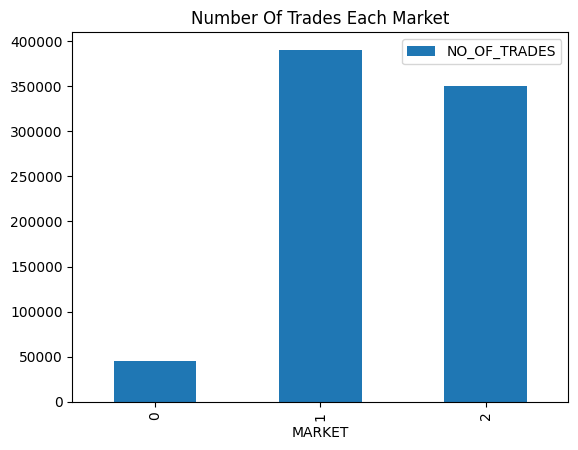

In [64]:
NOTM = pd.DataFrame(df.groupby(['MARKET'])['NO_OF_TRADES'].sum())
NOTM.plot.bar()
plt.title("Number Of Trades Each Market")
plt.show()

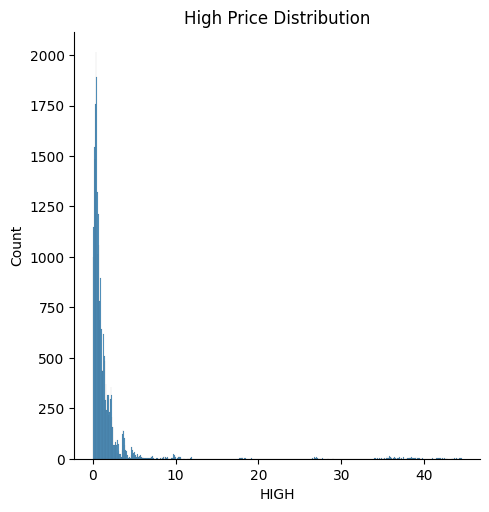

In [65]:
sns.displot(x = 'HIGH', data=df)
plt.title("High Price Distribution")
plt.show()

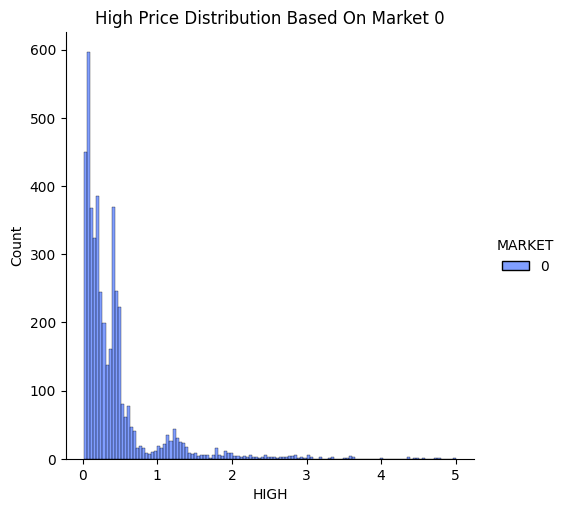

In [66]:
SeeH = df[(df['HIGH'] <= 5) & (df['MARKET'] == 0)]
sns.displot(x = 'HIGH', hue = 'MARKET', palette="bright", data=SeeH)
plt.title("High Price Distribution Based On Market 0")
plt.show()

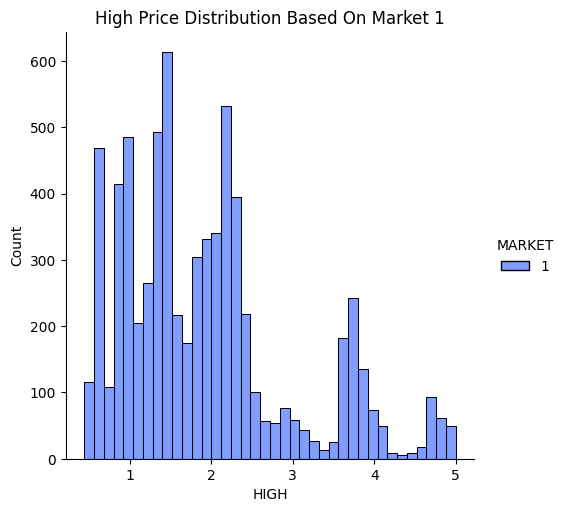

In [67]:
SeeH = df[(df['HIGH'] <= 5) & (df['MARKET'] == 1)]
sns.displot(x = 'HIGH', hue = 'MARKET', palette="bright", data=SeeH)
plt.title("High Price Distribution Based On Market 1")
plt.show()

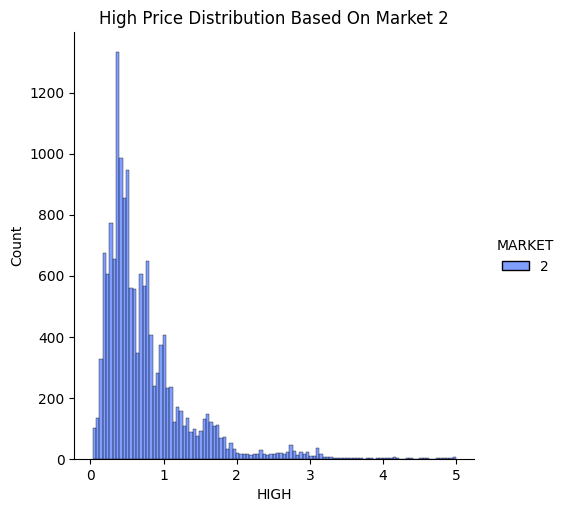

In [68]:
SeeH = df[(df['HIGH'] <= 5) & (df['MARKET'] == 2)]
sns.displot(x = 'HIGH', hue = 'MARKET', palette="bright", data=SeeH)
plt.title("High Price Distribution Based On Market 2")
plt.show()

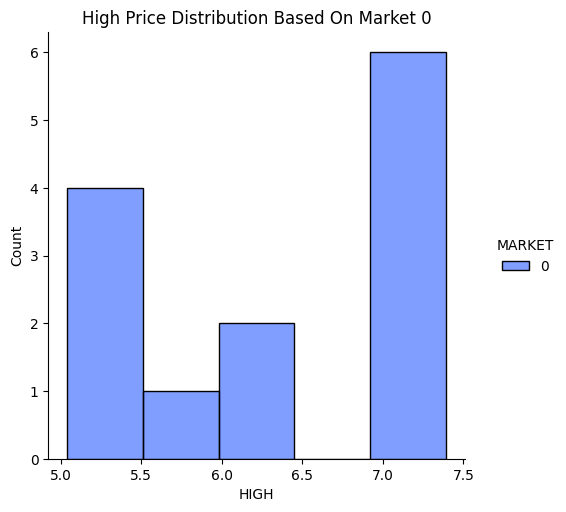

In [69]:
SeeH2 = df[(df['HIGH'] > 5) & (df['MARKET'] == 0)]
sns.displot(x = 'HIGH', hue = 'MARKET', palette="bright", data=SeeH2)
plt.title("High Price Distribution Based On Market 0")
plt.show()

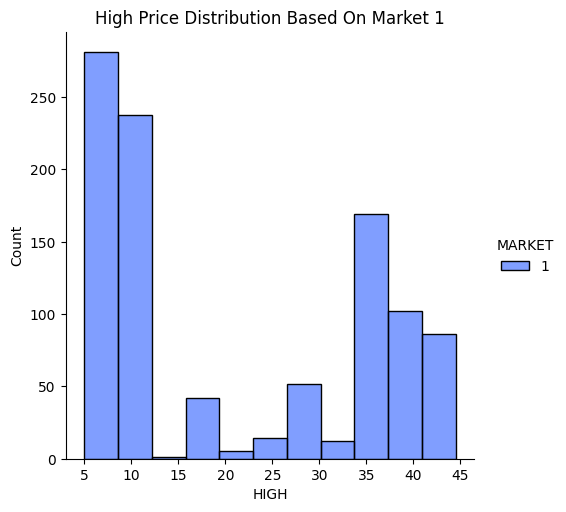

In [70]:
SeeH2 = df[(df['HIGH'] > 5) & (df['MARKET'] == 1)]
sns.displot(x = 'HIGH', hue = 'MARKET', palette="bright", data=SeeH2)
plt.title("High Price Distribution Based On Market 1")
plt.show()

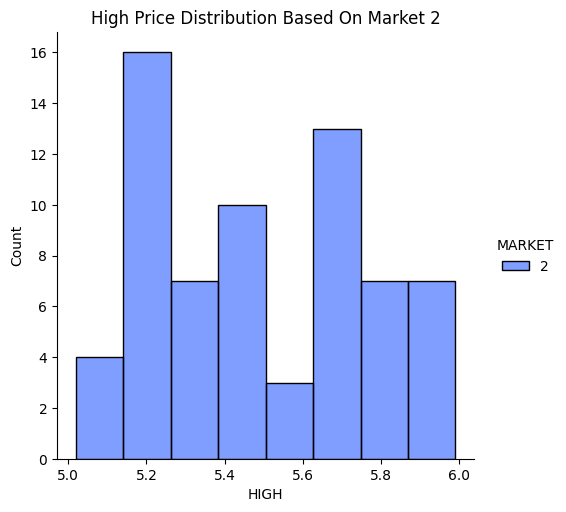

In [71]:
SeeH2 = df[(df['HIGH'] > 5) & (df['MARKET'] == 2)]
sns.displot(x = 'HIGH', hue = 'MARKET', palette="bright", data=SeeH2)
plt.title("High Price Distribution Based On Market 2")
plt.show()

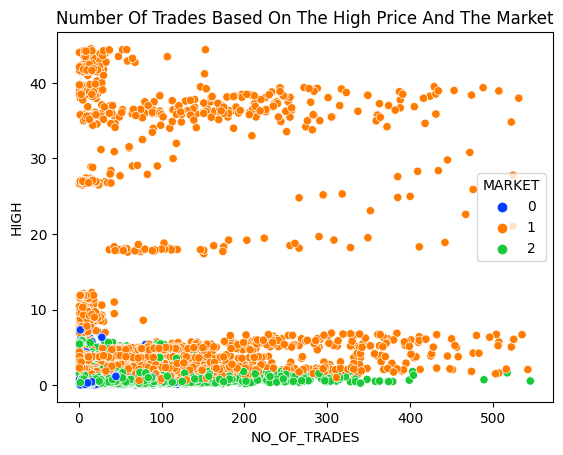

In [72]:
Less = df[(df['HIGH'] < 50) & (df['NO_OF_TRADES'] <= 545)]
sns.scatterplot(x = "NO_OF_TRADES", y = "HIGH", hue = 'MARKET', palette="bright", data = Less)
plt.title("Number Of Trades Based On The High Price And The Market")
plt.show()

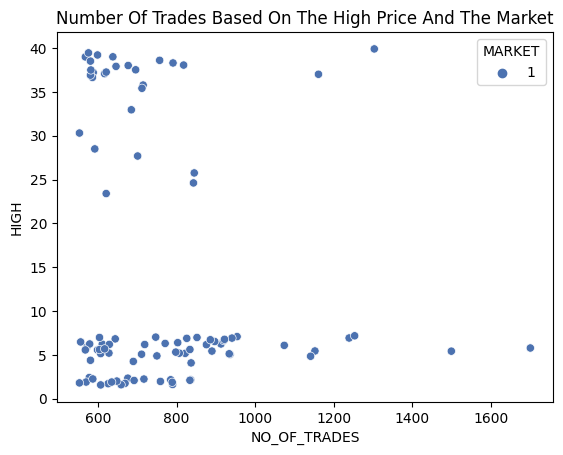

In [73]:
Highdf = df[(df['HIGH'] < 50) & (df['NO_OF_TRADES'] > 545)]
sns.scatterplot(x = "NO_OF_TRADES" , y = "HIGH", hue = 'MARKET', palette="deep", data = Highdf)
plt.title("Number Of Trades Based On The High Price And The Market")
plt.show()

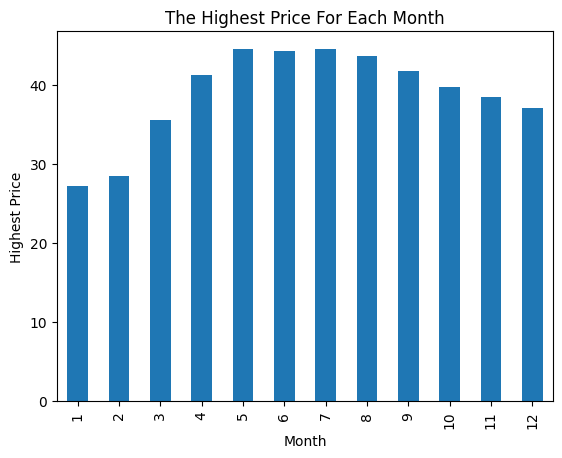

In [74]:
HEM.plot.bar()
plt.title("The Highest Price For Each Month")
plt.ylabel("Highest Price")
plt.show()

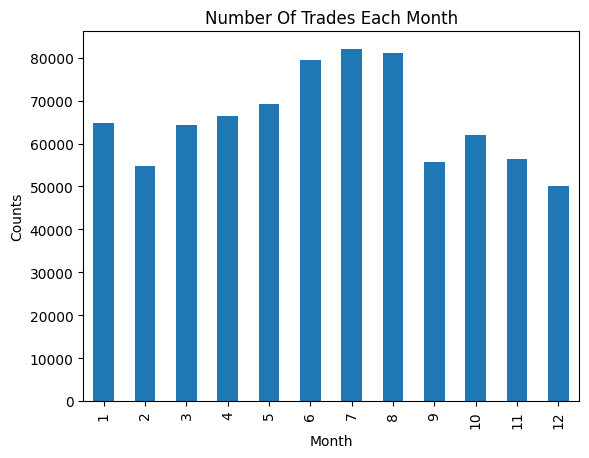

In [75]:
Trades.plot.bar()
plt.title("Number Of Trades Each Month")
plt.ylabel("Counts")
plt.show()

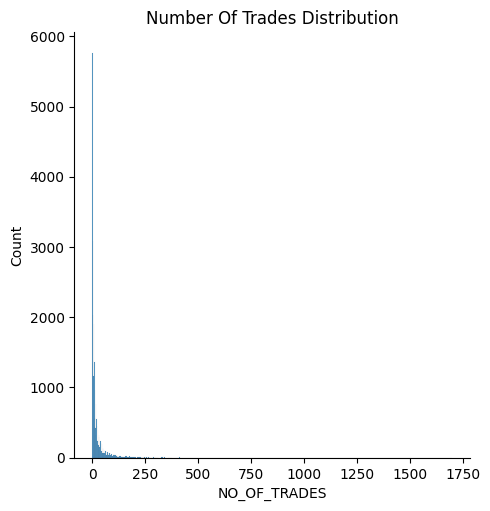

In [76]:
sns.displot(x = 'NO_OF_TRADES' , data = df)
plt.title("Number Of Trades Distribution")
plt.show()

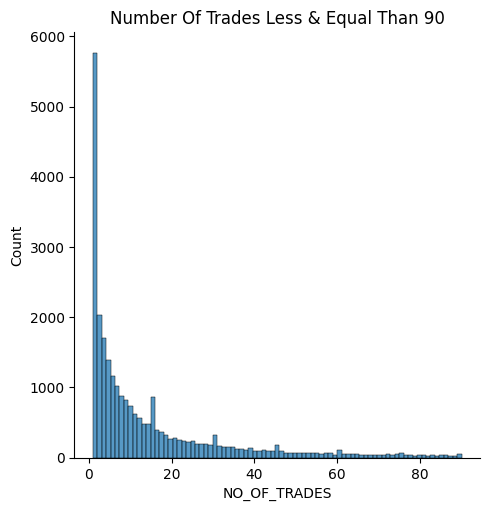

In [77]:
SeeN = df[df['NO_OF_TRADES'] <= 90]
sns.displot(x = 'NO_OF_TRADES' , data=SeeN)
plt.title("Number Of Trades Less & Equal Than 90")
plt.show()

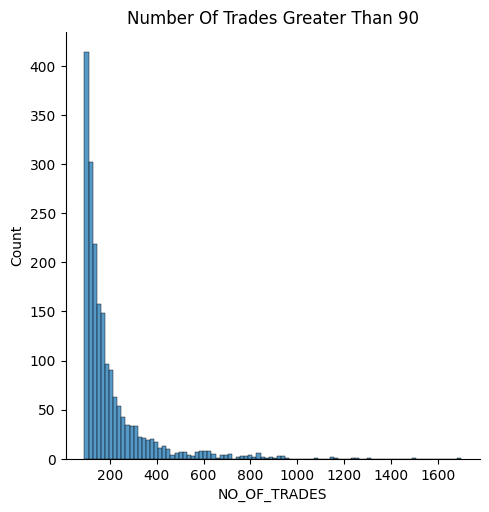

In [78]:
SeeN2 = df[df['NO_OF_TRADES'] > 90]
sns.displot(x = 'NO_OF_TRADES' , data=SeeN2)
plt.title("Number Of Trades Greater Than 90")
plt.show()

### 5.5. Extra Information

In [79]:
HighPrice = df.groupby(['SYMBOL1'])['NO_OF_TRADES' , 'VOLUME'].sum()
adf = pd.DataFrame(HighPrice)
adf
# ALFA is the lowest gain with (1) trade only and a volume equals to (37.4$)
# JOPH is the highest gain with (68677) trades and a volume equals to (319533626.62$ millions)
# JOPT is the second highest gain with (88038) trades and a volume equals to (291096910.1$ millions)
# The difference between Rank 1 and Rank 2 in gains is equal to (28436716.52$ millions)

<ipython-input-79-068bf896ea3b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  HighPrice = df.groupby(['SYMBOL1'])['NO_OF_TRADES' , 'VOLUME'].sum()


,NO_OF_TRADES,VOLUME
SYMBOL1,,
0,58,38524.82
1,304,192020.20
2,1351,885807.90
3,1491,533179.55
4,64,38867.09
...,...,...
208,1394,465314.75
209,2191,2357606.05
210,8,1921.20


# 6. Contingency Table

In [80]:
ccc = pd.pivot_table(df, values='NO_OF_TRADES', index='Month', columns='MARKET', aggfunc=sum)
ccc


MARKET,0,1,2
Month,,,
1,4828,22114,37893
2,3332,19575,31967
3,4284,29726,30270
4,2130,41953,22354
5,3595,41475,24136
6,4094,37568,37782
7,3731,49244,29064
8,4159,42979,33908
9,3661,28052,23912


In [105]:
cch = pd.pivot_table(df, values='HIGH', index='Month', columns='MARKET', aggfunc=sum)
cch

MARKET,0,1,2
Month,,,
1,196.60,2333.37,1293.77
2,165.44,2320.14,1096.97
3,212.52,2620.45,1097.65
4,121.51,2747.06,789.76
5,153.43,2690.87,725.87
6,223.86,3283.03,1042.03
7,130.01,2894.86,926.75
8,181.74,3565.67,1034.98
9,143.96,2971.20,978.09


# 7. Splitting & Models

### 7.1. Spliting

In [82]:
x = df.drop(['HIGH', 'LOW' , 'TRADE_DATE' , 'Month'], axis=1)
y = df['HIGH']

x2 = df.drop(['HIGH', 'LOW' , 'TRADE_DATE' , 'Month'], axis=1)
y2 = df['LOW']

from sklearn.model_selection import train_test_split

### 7.2. Models Objects

In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

SC = StandardScaler()
DTR = DecisionTreeRegressor(random_state=0)
LR = LinearRegression()
KNNR = KNeighborsRegressor(n_neighbors=5)

# 8. Feature Selection Methods

### 8.1. Sequential Feature Selection Method (Wrapper_High)

In [116]:
from sklearn.feature_selection import SequentialFeatureSelector
SFS = SequentialFeatureSelector(KNNR, n_features_to_select=5, direction='forward') 

SFS.fit(x, y)
x_SFS = SFS.transform(x)

SMAEH1  = []
SMSEH1  = []
SRMSEH1 = []
SR2H1   = []

for i in range(30):
    x_train, x_test, y_train, y_test = train_test_split(x_SFS, y, test_size=0.2, random_state=i)
    x_train = SC.fit_transform(x_train)
    x_test = SC.transform(x_test)
    
    KNNR.fit(x_train, y_train)
    y_pred = KNNR.predict(x_test)

    MAE = mean_absolute_error(y_test , y_pred)
    SMAEH1.append(MAE)

    MSE = mean_squared_error(y_test , y_pred)
    SMSEH1.append(MSE)

    RMSE = mean_squared_error(y_test , y_pred , squared=False)
    SRMSEH1.append(RMSE)

    R2 = r2_score(y_test , y_pred)
    SR2H1.append(R2)

SM1H = sum(SMAEH1)/len(SMAEH1)
SMS1H = sum(SMSEH1)/len(SMSEH1)
SRM1H = sum(SRMSEH1)/len(SRMSEH1)
SRR1H = sum(SR2H1)/len(SR2H1)

print("Features Selected: " , x.columns[SFS.get_support()])
print("MAE:  " , round(SM1H  , 3))
print("MSE:  " , round(SMS1H , 3))
print("RMSE: " , round(SRM1H , 3))
print("R2:   " , round(SRR1H , 3))

Features Selected:  Index(['SEC_CODE', 'SYMBOL1', 'MARKET', 'BEST_ASK_PRICE', 'BEST_BID_PRICE'], dtype='object')
MAE:   0.332
MSE:   2.629
RMSE:  1.616
R2:    0.879


In [117]:
SFS2 = SequentialFeatureSelector(DTR, n_features_to_select=5, direction='forward') 

SFS2.fit(x, y)
x_SFS2 = SFS2.transform(x)

SMAEH2 = []
SMSEH2 = []
SRMSEH2 = []
SR2H2 = []
for i in range(30):
    x_train, x_test, y_train, y_test = train_test_split(x_SFS2, y, test_size=0.2, random_state=i)
    x_train = SC.fit_transform(x_train)
    x_test = SC.transform(x_test)
    
    DTR.fit(x_train, y_train)
    y_pred = DTR.predict(x_test)

    MAE = mean_absolute_error(y_test , y_pred)
    SMAEH2.append(MAE)

    MSE = mean_squared_error(y_test , y_pred)
    SMSEH2.append(MSE)

    RMSE = mean_squared_error(y_test , y_pred , squared=False)
    SRMSEH2.append(RMSE)

    R2 = r2_score(y_test , y_pred)
    SR2H2.append(R2)

SM2H = sum(SMAEH2)/len(SMAEH2)
SMS2H = sum(SMSEH2)/len(SMSEH2)
SRM2H = sum(SRMSEH2)/len(SRMSEH2)
SRR2H = sum(SR2H2)/len(SR2H2)

print("Features Selected: " , x.columns[SFS2.get_support()])
print("MAE:  " , round(SM2H , 3))
print("MSE:  " , round(SMS2H , 3))
print("RMSE: " , round(SRM2H , 3))
print("R2:   " , round(SRR2H , 3))

Features Selected:  Index(['SEC_CODE', 'SYMBOL1', 'MARKET', 'NO_OF_TRADES', 'BEST_ASK_PRICE'], dtype='object')
MAE:   0.217
MSE:   1.218
RMSE:  1.098
R2:    0.944


In [118]:
SFS3 = SequentialFeatureSelector(LR, n_features_to_select=5, direction='forward') 

SFS3.fit(x, y)
x_SFS3 = SFS3.transform(x)

SMAEH3  = []
SMSEH3  = []
SRMSEH3 = []
SR2H3   = []

for i in range(30):
    x_train, x_test, y_train, y_test = train_test_split(x_SFS3, y, test_size=0.2, random_state=i)
    x_train = SC.fit_transform(x_train)
    x_test = SC.transform(x_test)
    
    LR.fit(x_train, y_train)
    y_pred = LR.predict(x_test)

    MAE = mean_absolute_error(y_test , y_pred)
    SMAEH3.append(MAE)

    MSE = mean_squared_error(y_test , y_pred)
    SMSEH3.append(MSE)

    RMSE = mean_squared_error(y_test , y_pred , squared=False)
    SRMSEH3.append(RMSE)

    R2 = r2_score(y_test , y_pred)
    SR2H3.append(R2)

SM3H = sum(SMAEH3)/len(SMAEH3)
SMS3H = sum(SMSEH3)/len(SMSEH3)
SRM3H = sum(SRMSEH3)/len(SRMSEH3)
SRR3H = sum(SR2H3)/len(SR2H3)

print("Features Selected: " , x.columns[SFS3.get_support()])
print("MAE:  " , round(SM3H , 3))
print("MSE:  " , round(SMS3H , 3))
print("RMSE: " , round(SRM3H , 3))
print("R2:   " , round(SRR3H , 3))

Features Selected:  Index(['SEC_CODE', 'SYMBOL1', 'MARKET', 'VOLUME', 'TRADE_QTY'], dtype='object')
MAE:   1.629
MSE:   17.838
RMSE:  4.221
R2:    0.178


### 8.2. SelectK Best (Filter_High)

In [119]:
from sklearn.feature_selection import SelectKBest, f_regression
SKB = SelectKBest(f_regression, k=6)

SKB.fit(x, y)
x_SKB = SKB.transform(x)

MAEH1  = []
MSEH1  = []
RMSEH1 = []
R2H1   = []

for i in range(30):
    x_train, x_test, y_train, y_test = train_test_split(x_SKB, y, test_size=0.2, random_state=i)
    x_train = SC.fit_transform(x_train)
    x_test = SC.transform(x_test)

    KNNR.fit(x_train, y_train)
    y_pred = KNNR.predict(x_test)

    MAE = mean_absolute_error(y_test , y_pred)
    MAEH1.append(MAE)

    MSE = mean_squared_error(y_test , y_pred)
    MSEH1.append(MSE)

    RMSE = mean_squared_error(y_test , y_pred , squared=False)
    RMSEH1.append(RMSE)

    R2 = r2_score(y_test , y_pred)
    R2H1.append(R2)

M1H = sum(MAEH1)/len(MAEH1)
MS1H = sum(MSEH1)/len(MSEH1)
RM1H = sum(RMSEH1)/len(RMSEH1)
RR1H = sum(R2H1)/len(R2H1)

print("Features Selected: " , x.columns[SKB.get_support()])
print("MAE:  " , round(M1H , 3))
print("MSE:  " , round(MS1H , 3))
print("RMSE: " , round(RM1H , 3))
print("R2:   " , round(RR1H , 3))

Features Selected:  Index(['SEC_CODE', 'MARKET', 'VOLUME', 'NO_OF_TRADES', 'BEST_ASK_PRICE',
       'BEST_BID_PRICE'],
      dtype='object')
MAE:   0.908
MSE:   9.784
RMSE:  3.125
R2:    0.549


In [120]:
MAEH2 = []
MSEH2 = []
RMSEH2 = []
R2H2 = []

for i in range(30):
    x_train, x_test, y_train, y_test = train_test_split(x_SKB, y, test_size=0.2, random_state=i)
    x_train = SC.fit_transform(x_train)
    x_test = SC.transform(x_test)
    
    DTR.fit(x_train, y_train)
    y_pred = DTR.predict(x_test)

    MAE = mean_absolute_error(y_test , y_pred)
    MAEH2.append(MAE)

    MSE = mean_squared_error(y_test , y_pred)
    MSEH2.append(MSE)

    RMSE = mean_squared_error(y_test , y_pred , squared=False)
    RMSEH2.append(RMSE)

    R2 = r2_score(y_test , y_pred)
    R2H2.append(R2)

M2H = sum(MAEH2)/len(MAEH2)
MS2H = sum(MSEH2)/len(MSEH2)
RM2H = sum(RMSEH2)/len(RMSEH2)
RR2H = sum(R2H2)/len(R2H2)
print("Features Selected: " , x.columns[SKB.get_support()])
print("MAE:  " , round(M2H , 3))
print("MSE:  " , round(MS2H , 3))
print("RMSE: " , round(RM2H , 3))
print("R2:   " , round(RR2H , 3))

Features Selected:  Index(['SEC_CODE', 'MARKET', 'VOLUME', 'NO_OF_TRADES', 'BEST_ASK_PRICE',
       'BEST_BID_PRICE'],
      dtype='object')
MAE:   0.24
MSE:   1.587
RMSE:  1.255
R2:    0.927


In [121]:
MAEH3 = []
MSEH3 = []
RMSEH3 = []
R2H3 = []

for i in range(30):
    x_train, x_test, y_train, y_test = train_test_split(x_SKB, y, test_size=0.2, random_state=i)
    x_train = SC.fit_transform(x_train)
    x_test = SC.transform(x_test)
    
    LR.fit(x_train, y_train)
    y_pred = LR.predict(x_test)

    MAE = mean_absolute_error(y_test , y_pred)
    MAEH3.append(MAE)

    MSE = mean_squared_error(y_test , y_pred)
    MSEH3.append(MSE)

    RMSE = mean_squared_error(y_test , y_pred , squared=False)
    RMSEH3.append(RMSE)

    R2 = r2_score(y_test , y_pred)
    R2H3.append(R2)

M3H = sum(MAEH3)/len(MAEH3)
MS3H = sum(MSEH3)/len(MSEH3)
RM3H = sum(RMSEH3)/len(RMSEH3)
RR3H = sum(R2H3)/len(R2H3)

print("Features Selected: " , x.columns[SKB.get_support()])
print("MAE:  " , round(M3H , 3))
print("MSE:  " , round(MS3H , 3))
print("RMSE: " , round(RM3H , 3))
print("R2:   " , round(RR3H , 3))

Features Selected:  Index(['SEC_CODE', 'MARKET', 'VOLUME', 'NO_OF_TRADES', 'BEST_ASK_PRICE',
       'BEST_BID_PRICE'],
      dtype='object')
MAE:   1.681
MSE:   19.101
RMSE:  4.368
R2:    0.12


### 8.3. Sequential Feature Selection Method (Wrapper_Low)

In [122]:
LSFS1 = SequentialFeatureSelector(KNNR, n_features_to_select=5, direction='forward') 

LSFS1.fit(x2, y2)
x_SFS1L = LSFS1.transform(x2)

SMAEL1 = []
SMSEL1 = []
SRMSEL1 = []
SR2L1 = []
for i in range(30):
    x_train, x_test, y_train, y_test = train_test_split(x_SFS1L, y2, test_size=0.2, random_state=i)
    x_train = SC.fit_transform(x_train)
    x_test = SC.transform(x_test)
    
    KNNR.fit(x_train, y_train)
    y_pred = KNNR.predict(x_test)

    MAE = mean_absolute_error(y_test , y_pred)
    SMAEL1.append(MAE)

    MSE = mean_squared_error(y_test , y_pred)
    SMSEL1.append(MSE)

    RMSE = mean_squared_error(y_test , y_pred , squared=False)
    SRMSEL1.append(RMSE)

    R2 = r2_score(y_test , y_pred)
    SR2L1.append(R2)

SM1L = sum(SMAEL1)/len(SMAEL1)
SMS1L = sum(SMSEL1)/len(SMSEL1)
SRM1L = sum(SRMSEL1)/len(SRMSEL1)
SRR1L = sum(SR2L1)/len(SR2L1)

print("Features Selected: " , x.columns[LSFS1.get_support()])
print("MAE:  " , round(SM1L , 3))
print("MSE:  " , round(SMS1L , 3))
print("RMSE: " , round(SRM1L , 3))
print("R2:   " , round(SRR1L , 3))

Features Selected:  Index(['SEC_CODE', 'SYMBOL1', 'MARKET', 'BEST_ASK_PRICE', 'BEST_BID_PRICE'], dtype='object')
MAE:   0.324
MSE:   2.485
RMSE:  1.571
R2:    0.882


In [123]:
LSFS2 = SequentialFeatureSelector(DTR, n_features_to_select=5, direction='forward') 

LSFS2.fit(x2, y2)
x_SFS2L = LSFS2.transform(x2)

SMAEL2 = []
SMSEL2 = []
SRMSEL2 = []
SR2L2 = []

for i in range(30):
    x_train, x_test, y_train, y_test = train_test_split(x_SFS2L, y2, test_size=0.2, random_state=i)
    x_train = SC.fit_transform(x_train)
    x_test = SC.transform(x_test)
    
    DTR.fit(x_train, y_train)
    y_pred = DTR.predict(x_test)

    MAE = mean_absolute_error(y_test , y_pred)
    SMAEL2.append(MAE)

    MSE = mean_squared_error(y_test , y_pred)
    SMSEL2.append(MSE)

    RMSE = mean_squared_error(y_test , y_pred , squared=False)
    SRMSEL2.append(RMSE)

    R2 = r2_score(y_test , y_pred)
    SR2L2.append(R2)

SM2L = sum(SMAEL2)/len(SMAEL2)
SMS2L = sum(SMSEL2)/len(SMSEL2)
SRM2L = sum(SRMSEL2)/len(SRMSEL2)
SRR2L = sum(SR2L2)/len(SR2L2)

print("Features Selected: " , x.columns[LSFS2.get_support()])
print("MAE:  " , round(SM2L , 3))
print("MSE:  " , round(SMS2L , 3))
print("RMSE: " , round(SRM2L , 3))
print("R2:   " , round(SRR2L , 3))

Features Selected:  Index(['SEC_CODE', 'SYMBOL1', 'MARKET', 'BEST_ASK_PRICE', 'BEST_BID_PRICE'], dtype='object')
MAE:   0.213
MSE:   1.182
RMSE:  1.081
R2:    0.944


In [124]:
LSFS3 = SequentialFeatureSelector(LR, n_features_to_select=5, direction='forward') 

LSFS3.fit(x2, y2)
x_SFS3L = LSFS3.transform(x2)

SMAEL3  = []
SMSEL3  = []
SRMSEL3 = []
SR2L3   = []
for i in range(30):
    x_train, x_test, y_train, y_test = train_test_split(x_SFS3L, y2, test_size=0.2, random_state=i)
    x_train = SC.fit_transform(x_train)
    x_test = SC.transform(x_test)
    
    LR.fit(x_train, y_train)
    y_pred = LR.predict(x_test)

    MAE = mean_absolute_error(y_test , y_pred)
    SMAEL3.append(MAE)

    MSE = mean_squared_error(y_test , y_pred)
    SMSEL3.append(MSE)

    RMSE = mean_squared_error(y_test , y_pred , squared=False)
    SRMSEL3.append(RMSE)

    R2 = r2_score(y_test , y_pred)
    SR2L3.append(R2)

SM3L = sum(SMAEL3)/len(SMAEL3)
SMS3L = sum(SMSEL3)/len(SMSEL3)
SRM3L = sum(SRMSEL3)/len(SRMSEL3)
SRR3L = sum(SR2L3)/len(SR2L3)

print("Features Selected: " , x.columns[LSFS3.get_support()])
print("MAE:  " , round(SM3L , 3))
print("MSE:  " , round(SMS3L , 3))
print("RMSE: " , round(SRM3L , 3))
print("R2:   " , round(SRR3L , 3))

Features Selected:  Index(['SEC_CODE', 'SYMBOL1', 'MARKET', 'VOLUME', 'TRADE_QTY'], dtype='object')
MAE:   1.603
MSE:   17.284
RMSE:  4.154
R2:    0.174


### 8.4. SelectK Best (Filter_Low)

In [125]:
from sklearn.feature_selection import SelectKBest, f_regression
SKBL = SelectKBest(f_regression, k=6)
SKBL.fit(x2, y2)
x2_SKB = SKBL.transform(x2)

MAEL1  = []
MSEL1  = []
RMSEL1 = []
R2L1   = []

for i in range(30):
    x_train, x_test, y_train, y_test = train_test_split(x2_SKB, y2, test_size=0.2, random_state=i)
    x_train = SC.fit_transform(x_train)
    x_test = SC.transform(x_test)
    
    KNNR.fit(x_train, y_train)
    y_pred = KNNR.predict(x_test)

    MAE = mean_absolute_error(y_test , y_pred)
    MAEL1.append(MAE)

    MSE = mean_squared_error(y_test , y_pred)
    MSEL1.append(MSE)

    RMSE = mean_squared_error(y_test , y_pred , squared=False)
    RMSEL1.append(RMSE)

    R2 = r2_score(y_test , y_pred)
    R2L1.append(R2)

M1L = sum(MAEL1)/len(MAEL1)
MS1L = sum(MSEL1)/len(MSEL1)
RM1L = sum(RMSEL1)/len(RMSEL1)
RR1L = sum(R2L1)/len(R2L1)

print("Features Selected: " , x.columns[SKBL.get_support()])
print("MAE:  " , round(M1L , 3))
print("MSE:  " , round(MS1L , 3))
print("RMSE: " , round(RM1L , 3))
print("R2:   " , round(RR1L , 3))

Features Selected:  Index(['SEC_CODE', 'MARKET', 'VOLUME', 'NO_OF_TRADES', 'BEST_ASK_PRICE',
       'BEST_BID_PRICE'],
      dtype='object')
MAE:   0.89
MSE:   9.439
RMSE:  3.07
R2:    0.548


In [126]:
MAEL2  = []
MSEL2  = []
RMSEL2 = []
R2L2   = []

for i in range(30):
    x_train, x_test, y_train, y_test = train_test_split(x2_SKB, y2, test_size=0.2, random_state=i)
    x_train = SC.fit_transform(x_train)
    x_test = SC.transform(x_test)
    
    DTR.fit(x_train, y_train)
    y_pred = DTR.predict(x_test)

    MAE = mean_absolute_error(y_test , y_pred)
    MAEL2.append(MAE)

    MSE = mean_squared_error(y_test , y_pred)
    MSEL2.append(MSE)

    RMSE = mean_squared_error(y_test , y_pred , squared=False)
    RMSEL2.append(RMSE)

    R2 = r2_score(y_test , y_pred)
    R2L2.append(R2)

M2L = sum(MAEL2)/len(MAEL2)
MS2L = sum(MSEL2)/len(MSEL2)
RM2L = sum(RMSEL2)/len(RMSEL2)
RR2L = sum(R2L2)/len(R2L2)

print("Features Selected: " , x.columns[SKBL.get_support()])
print("MAE:  " , round(M2L , 3))
print("MSE:  " , round(MS2L , 3))
print("RMSE: " , round(RM2L , 3))
print("R2:   " , round(RR2L , 3))

Features Selected:  Index(['SEC_CODE', 'MARKET', 'VOLUME', 'NO_OF_TRADES', 'BEST_ASK_PRICE',
       'BEST_BID_PRICE'],
      dtype='object')
MAE:   0.236
MSE:   1.545
RMSE:  1.239
R2:    0.926


In [127]:
MAEL3  = []
MSEL3  = []
RMSEL3 = []
R2L3   = []
for i in range(30):
    x_train, x_test, y_train, y_test = train_test_split(x2_SKB, y2, test_size=0.2, random_state=i)
    x_train = SC.fit_transform(x_train)
    x_test = SC.transform(x_test)
    
    LR.fit(x_train, y_train)
    y_pred = LR.predict(x_test)

    MAE = mean_absolute_error(y_test , y_pred)
    MAEL3.append(MAE)

    MSE = mean_squared_error(y_test , y_pred)
    MSEL3.append(MSE)

    RMSE = mean_squared_error(y_test , y_pred , squared=False)
    RMSEL3.append(RMSE)

    R2 = r2_score(y_test , y_pred)
    R2L3.append(R2)

M3L = sum(MAEL3)/len(MAEL3)
MS3L = sum(MSEL3)/len(MSEL3)
RM3L = sum(RMSEL3)/len(RMSEL3)
RR3L = sum(R2L3)/len(R2L3)

print("Features Selected: " , x.columns[SKBL.get_support()])
print("MAE:  " , round(M3L , 3))
print("MSE:  " , round(MS3L , 3))
print("RMSE: " , round(RM3L , 3))
print("R2:   " , round(RR3L , 3))

Features Selected:  Index(['SEC_CODE', 'MARKET', 'VOLUME', 'NO_OF_TRADES', 'BEST_ASK_PRICE',
       'BEST_BID_PRICE'],
      dtype='object')
MAE:   1.654
MSE:   18.477
RMSE:  4.296
R2:    0.117


# 9. Analyzing Results

In [128]:
xv = ['KNNR','DTR','LR']

### 9.1. Bar Plot (High)

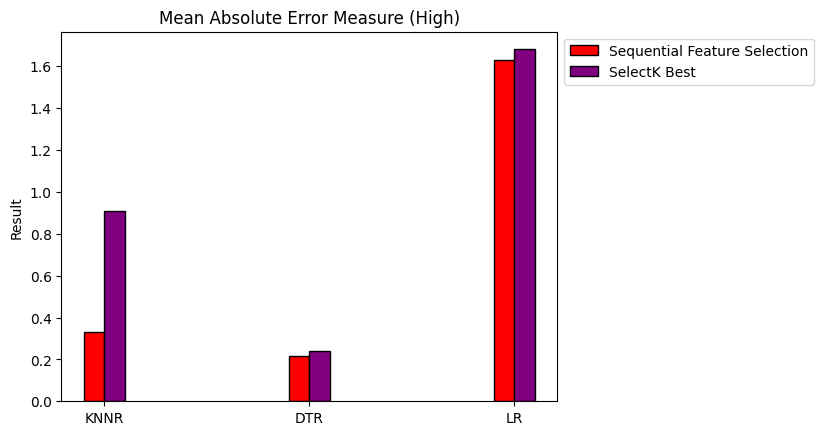

In [129]:
M = [SM1H , SM2H , SM3H]
M2 = [M1H , M2H , M3H]

X_axis = np.arange(len(xv))  

plt.bar(X_axis + 0.15 , M  , color = 'Red' ,    width = 0.10 , edgecolor = 'black' , label = 'Sequential Feature Selection')
plt.bar(X_axis + 0.25 , M2 , color = 'Purple' , width = 0.10 , edgecolor = 'black' , label = 'SelectK Best')

plt.xticks(X_axis + 0.20, xv)
plt.legend(bbox_to_anchor=(1 , 1))

plt.ylabel("Result")
plt.title("Mean Absolute Error Measure (High)")
plt.show()

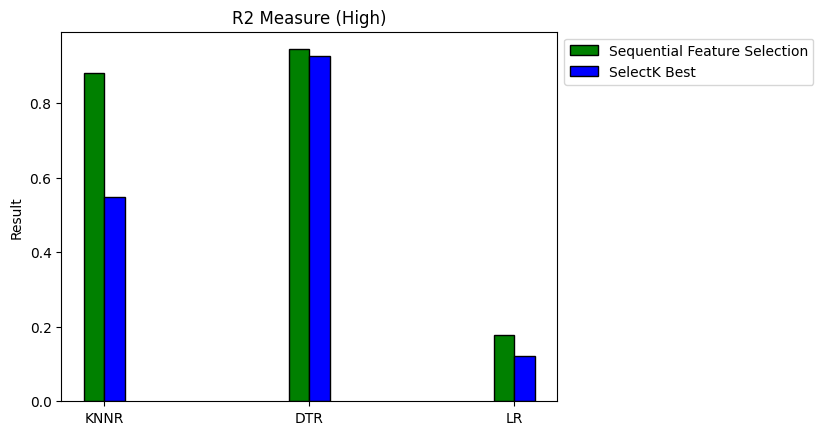

In [130]:
RR = [SRR1H , SRR2H , SRR3H]
RR2 = [RR1H , RR2H , RR3H]
X_axis = np.arange(len(xv))  

plt.bar(X_axis + 0.15 , RR  , color = 'Green' , width = 0.10 , edgecolor = 'black' , label = 'Sequential Feature Selection')
plt.bar(X_axis + 0.25 , RR2 , color = 'Blue'  , width = 0.10 , edgecolor = 'black' , label = 'SelectK Best')

plt.xticks(X_axis + 0.20, xv)
plt.legend(bbox_to_anchor=(1 , 1))

plt.ylabel("Result")
plt.title("R2 Measure (High)")
plt.show()

### 9.2 Bar Plot (Low)

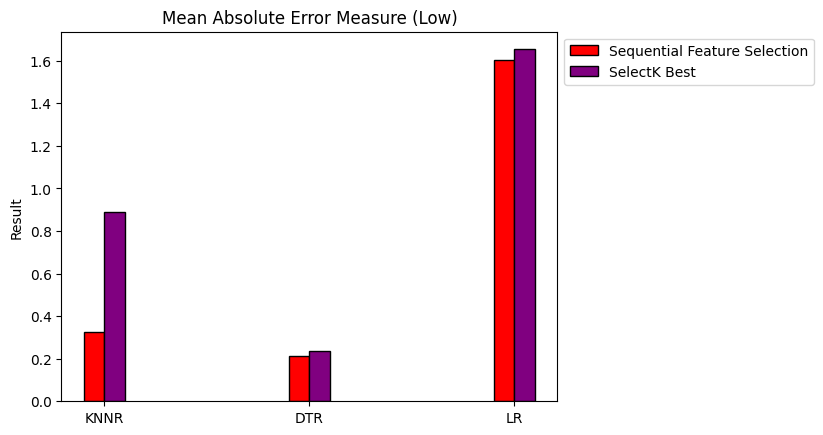

In [131]:
ML = [SM1L , SM2L , SM3L]
ML2 = [M1L , M2L , M3L]
X_axis = np.arange(len(xv)) 

plt.bar(X_axis + 0.15 , ML  , color = 'Red'    , width = 0.10 , edgecolor = 'black' , label = 'Sequential Feature Selection')
plt.bar(X_axis + 0.25 , ML2 , color = 'Purple' , width = 0.10 , edgecolor = 'black' , label = 'SelectK Best')

plt.xticks(X_axis + 0.20, xv)
plt.legend(bbox_to_anchor=(1 , 1))

plt.ylabel("Result")
plt.title("Mean Absolute Error Measure (Low)")
plt.show()

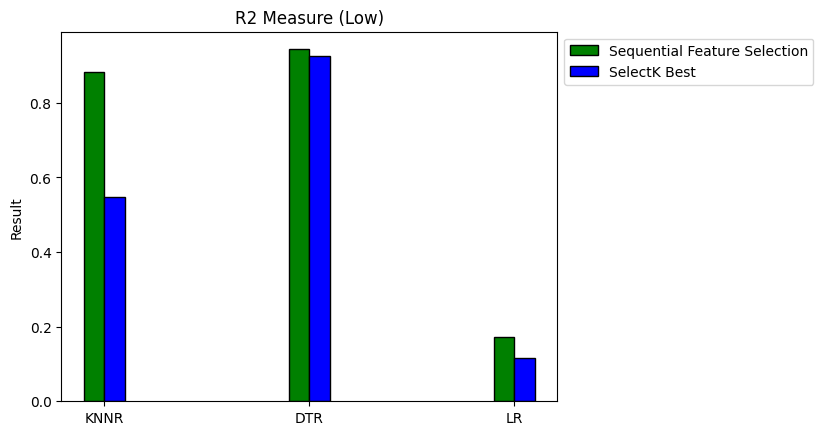

In [132]:
RRL = [SRR1L , SRR2L , SRR3L]
RRL2 = [RR1L , RR2L , RR3L]
X_axis = np.arange(len(xv))  

plt.bar(X_axis + 0.15 , RRL  , color = 'Green' , width = 0.10 , edgecolor = 'black' , label = 'Sequential Feature Selection')
plt.bar(X_axis + 0.25 , RRL2 , color = 'Blue'  , width = 0.10 , edgecolor = 'black' , label = 'SelectK Best')

plt.xticks(X_axis + 0.20, xv)
plt.legend(bbox_to_anchor=(1 , 1))

plt.ylabel("Result")
plt.title("R2 Measure (Low)")
plt.show()

### 9.3. Box Plot (High)

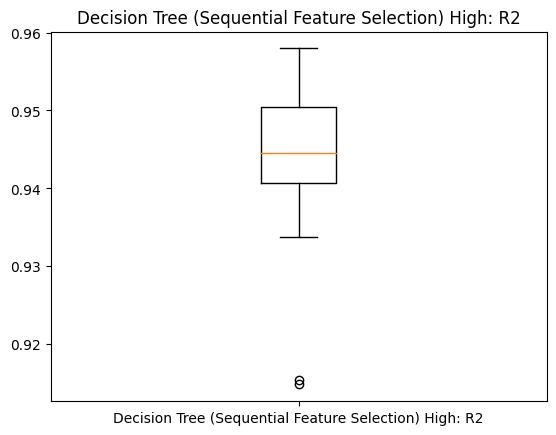

In [133]:
arrH = np.array(SR2H2)

dict = {'Decision Tree (Sequential Feature Selection) High: R2' : arrH}
fig, ax = plt.subplots()

fig.suptitle('')
ax.boxplot(dict.values())
ax.set_xticklabels(dict.keys())
plt.title("Decision Tree (Sequential Feature Selection) High: R2")
plt.show()

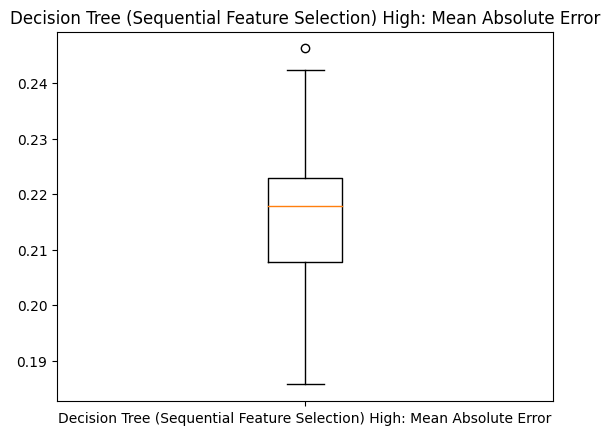

In [134]:
arrH2 = np.array(SMAEH2)

dict = {'Decision Tree (Sequential Feature Selection) High: Mean Absolute Error' : arrH2}
fig, ax = plt.subplots()

fig.suptitle('')
ax.boxplot(dict.values())
ax.set_xticklabels(dict.keys())
plt.title("Decision Tree (Sequential Feature Selection) High: Mean Absolute Error")
plt.show()

### 9.4. Box Plot (Low)

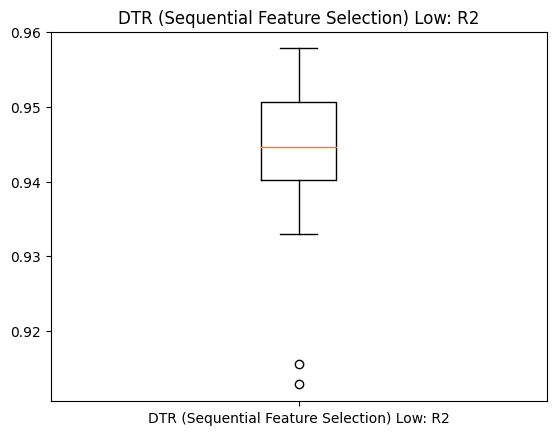

In [135]:
arrL = np.array(SR2L2)

dict = {'DTR (Sequential Feature Selection) Low: R2' : arrL}
fig, ax = plt.subplots()

fig.suptitle('')
ax.boxplot(dict.values())
ax.set_xticklabels(dict.keys())
plt.title("DTR (Sequential Feature Selection) Low: R2")
plt.show()

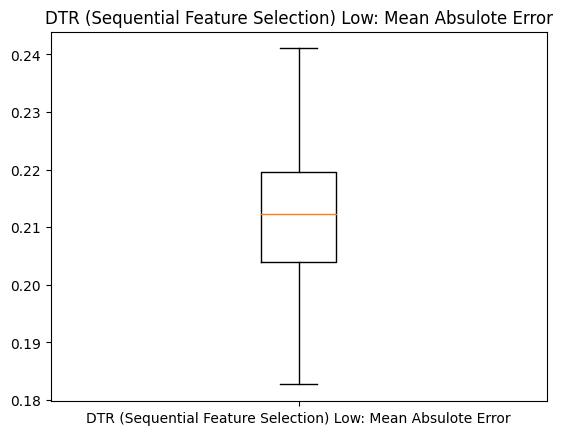

In [136]:
arrL2 = np.array(SMAEL2)

dict = {'DTR (Sequential Feature Selection) Low: Mean Absulote Error' : arrL2}
fig, ax = plt.subplots()

fig.suptitle('')
ax.boxplot(dict.values())
ax.set_xticklabels(dict.keys())
plt.title("DTR (Sequential Feature Selection) Low: Mean Absulote Error")
plt.show()